Importing libraries and csv files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
data = pd.read_csv("Data.csv")
output = pd.read_csv("sample_submission.csv")

In [3]:
data.shape

(2783, 133)

In [4]:
data= data.drop(columns=["row ID"])

In [5]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
output.head()

,row ID,cluster
0,Row0,0
1,Row1,0
2,Row2,0
3,Row3,0
4,Row4,0


Removing null values

In [7]:
for columns in data:
    if(data[columns].isna().sum() > 0):
        data[columns] = data[columns].fillna(data[columns].median())

Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for columns in data.select_dtypes(['object']):
    data[columns] = le.fit_transform(data[columns])

Standard Scaler

In [9]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
data_ss = SS.fit_transform(data)

PCA

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.75)
data_pca = pca.fit_transform(data_ss)

In [11]:
data_pca.shape

(2783, 13)

K-Means Algo

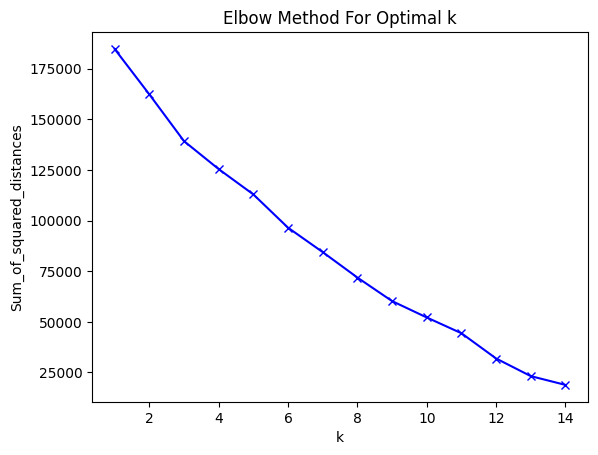

In [12]:
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_pca)
    Sum_of_squared_distances.append(km.inertia_)
#Visualing the plot
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [34]:
kmeans = KMeans(n_clusters=6,random_state=0,max_iter=100)
Kmodel = kmeans.fit(data_pca)

In [35]:
Kmodel.cluster_centers_

array([[-1.71024283e+00,  7.83063466e-01,  6.15022619e+00,
         7.44186387e-01,  1.66299095e+00,  6.39801532e+00,
        -3.96439447e+00,  2.45852002e+00, -4.79509828e-01,
        -1.25814639e+00,  2.55050619e-01,  3.43048636e-01,
        -2.32177967e-01],
       [-4.33983189e-01, -1.18674206e+00, -1.49194692e-01,
         2.53089329e-01, -3.63953549e-01, -4.11421860e-01,
        -1.95606277e-01, -2.03007231e-01, -2.12246131e-01,
         3.49859983e-01, -1.16641075e-01,  4.82537305e-02,
         1.05079311e-03],
       [ 1.22776037e+01,  3.60924939e+00,  4.42060607e+00,
        -2.31799730e+00, -1.76400647e+00, -5.78517319e-01,
         1.65978008e-01, -9.88427272e-01,  9.73433289e-01,
         6.26556547e-01, -5.19337808e-01, -1.88167350e-01,
        -7.30967447e-02],
       [-3.24866466e+00,  7.79935133e+00, -2.17754339e+00,
        -6.09551053e-01, -7.99205186e-01,  3.74492517e-02,
        -2.44894400e-01, -4.73745466e-01,  8.93739151e-01,
        -2.55759857e-01,  3.79239436e

In [36]:
Kmodel.inertia_

99446.87838098663

In [37]:
Kmodel.labels_

array([1, 1, 1, ..., 1, 4, 1])

In [38]:
print(kmeans.n_clusters,
kmeans.n_iter_)

6 2


In [39]:
o = kmeans.predict(data_pca)
o

array([1, 1, 1, ..., 1, 4, 1])

PLOT ELBOW CURVE

In [40]:
WSS = []
for k in range(2,13):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_pca)
    WSS.append(kmeans.inertia_)
print(WSS) 

[160067.3412520949, 146181.80461287193, 126750.95393097689, 111407.47446961756, 98683.87438527415, 85248.18886742396, 73074.18139796151, 61849.57275637629, 50994.98578664991, 41589.388315927055, 31653.091541689675]


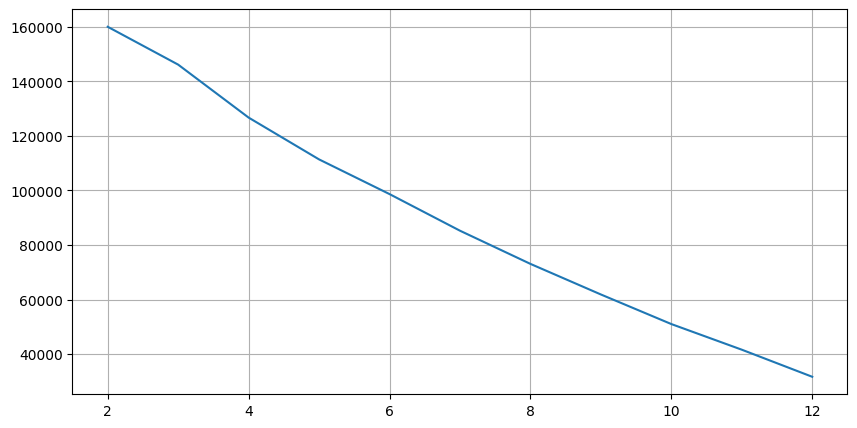

In [41]:
plt.figure(figsize=(10,5))
plt.plot(range(2,13),WSS)
plt.grid(True)

LOCATE ELBOW IN ELBOW-CURVE

In [42]:
from kneed import KneeLocator

kl = KneeLocator(range(2, 13), WSS, curve="convex", direction="decreasing")
kl.elbow

c:\Python39\lib\site-packages\kneed\knee_locator.py:311: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


Plot Silhouette Curve

In [43]:
from sklearn.metrics import silhouette_score

s_avg = []
for k in range(2, 13):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_pca)
    sil_sc = silhouette_score(data_pca, kmeans.labels_)
    s_avg.append(sil_sc)
print(s_avg)

[0.40055227948389444, 0.3086669844048325, 0.29306478215374593, 0.2783231507032864, 0.3272725204609914, 0.4135991394201057, 0.3898532147083526, 0.4662686280394939, 0.5274979829890498, 0.5577933658008493, 0.5985477629200308]


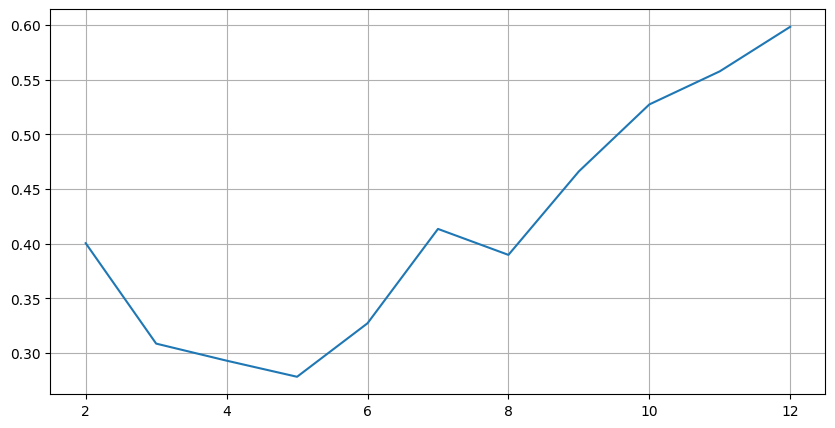

In [44]:
plt.figure(figsize=(10,5))
plt.plot(range(2,13),s_avg)
plt.grid(True)

plt.show()

In [24]:
output["cluster"] = o

In [25]:
output.to_csv('kmeans1.csv', index = False)

Agglomerative Clustering

In [26]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters = 7,affinity='euclidean', linkage='ward')
agg.fit(data_pca)

AgglomerativeClustering(n_clusters=7)

In [27]:
agg.n_clusters

7

In [28]:
agg.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [29]:
oo = agg.fit_predict(data_pca)
print(oo)

[1 1 1 ... 0 0 0]


In [30]:
output2 = pd.read_csv("sample_submission.csv")

In [31]:
output2["cluster"] = oo

In [32]:
output2.to_csv('agglomerative.csv', index = False)

DENDOGRAM

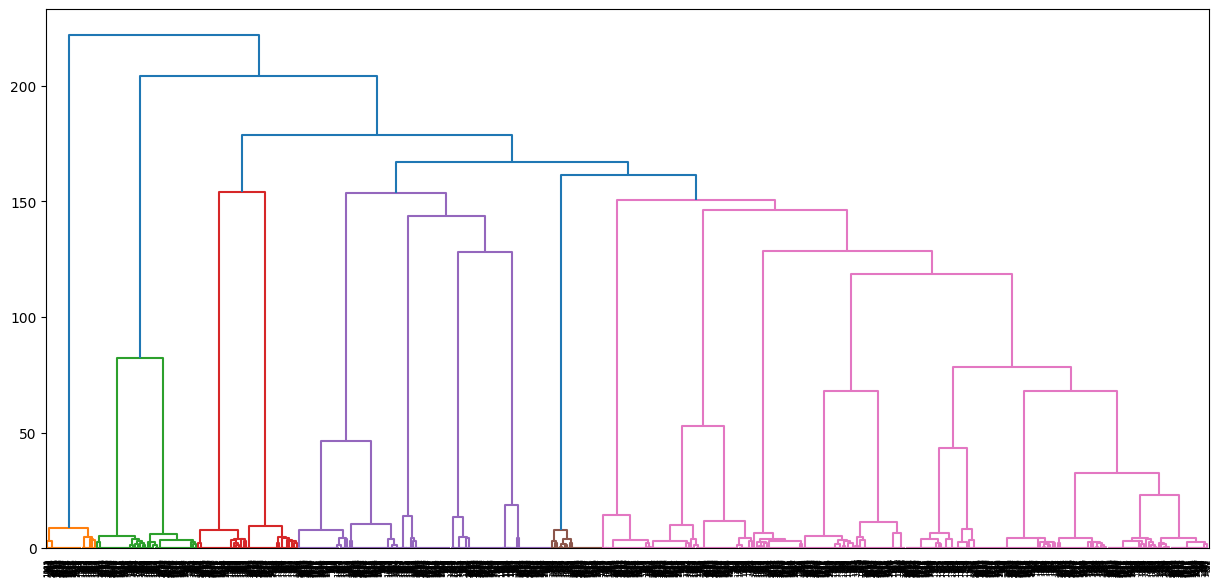

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(data_pca, 'ward')
plt.figure(figsize=(15, 7))
dendrogram(linked) 
plt.show()